# Histogram of Oriented Gradients

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Type <class 'numpy.ndarray'>  size: (1271, 1920, 3)


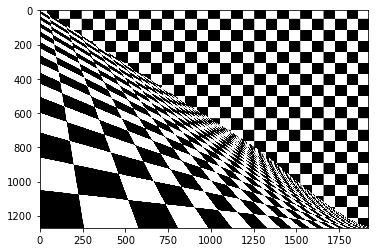

In [2]:
image = cv2.cvtColor(cv2.imread("chess.jpg"), cv2.COLOR_BGR2RGB)
print("Type", type(image), " size:", image.shape)

plt.imshow(image)

### Sobel

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Compute the gradients in the x and y directions
gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1)

# Compute the magnitude and direction of the image gradient
mag, ang = cv2.cartToPolar(gx, gy)

### Create bins

In [4]:
# Creating bin ranges
n_bins = 9
bins = np.int32(n_bins*ang/(2*np.pi))

### HOG Descriptor

In [6]:
# Parameters you define for a HOG feature vector
win_size = (64, 64)
block_size = (16, 16)
block_stride = (5, 5)
cell_size = (8, 8)

# Create the HOG descriptor
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, n_bins)

# Using the descriptor, calculate the feature vector of an image
feature_vector = hog.compute(image)

error: C:\bld\opencv_1498174012660\work\opencv-3.2.0\modules\objdetect\src\hog.cpp:92: error: (-215) (winSize.width - blockSize.width) % blockStride.width == 0 && (winSize.height - blockSize.height) % blockStride.height == 0 in function cv::HOGDescriptor::getDescriptorSize
